<a href="https://colab.research.google.com/github/Axel02leon/Intro-to-Machine-Learning-/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.datasets import load_breast_cancer

# Problem 1
*   Identify the optimum number of K
*   Plot classification accuracy, precision, recall over different Ks
*   Explore different kernel tricks and plot results
*   Compare results with homework 3 logistic regression

In [32]:
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

optimal_k = {'linear': 0, 'rbf': 0, 'poly': 0}
max_accuracy = {'linear': 0, 'rbf': 0, 'poly': 0}

# Dictionary to store results for plotting
results = {
    'n_components': [],
    'accuracy_linear': [],
    'accuracy_rbf': [],
    'accuracy_poly': [],
    'precision_linear': [],
    'precision_rbf': [],
    'precision_poly': [],
    'recall_linear': [],
    'recall_rbf': [],
    'recall_poly': []
}

In [33]:
for n_components in range(1, X.shape[1] + 1):  # Try from 1 to max number of features
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_std)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # Fit and evaluate SVM with different kernels
    for kernel in ['linear', 'rbf', 'poly']:
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Update results dictionary
        results[f'accuracy_{kernel}'].append(accuracy)
        results[f'precision_{kernel}'].append(precision)
        results[f'recall_{kernel}'].append(recall)

        # Update max accuracy and optimal K for each kernel
        if accuracy > max_accuracy[kernel]:
            max_accuracy[kernel] = accuracy
            optimal_k[kernel] = n_components

    # Store the number of components
    results['n_components'].append(n_components)

# Print optimal K for each kernel
print("Optimal number of PCA components (K) for highest accuracy:")
for kernel in optimal_k:
    print(f"{kernel.capitalize()} Kernel: K = {optimal_k[kernel]} with Accuracy = {max_accuracy[kernel]:.4f}")


Optimal number of PCA components (K) for highest accuracy:
Linear Kernel: K = 5 with Accuracy = 0.9883
Rbf Kernel: K = 14 with Accuracy = 0.9825
Poly Kernel: K = 5 with Accuracy = 0.9064


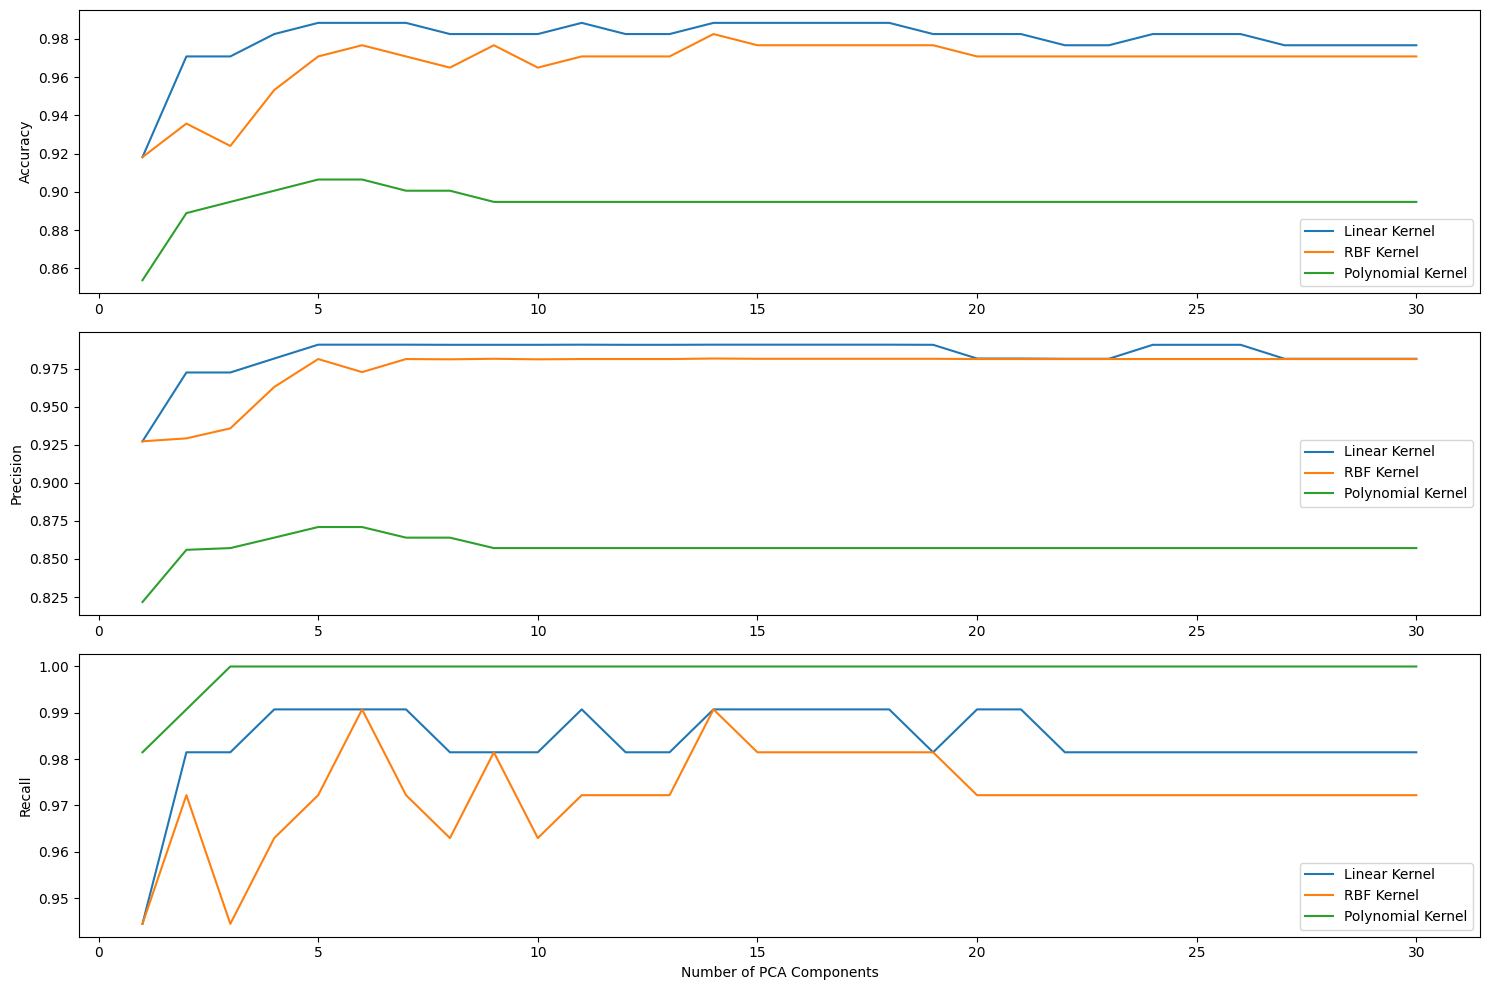

Logistic Regression Accuracy: 0.9825
Logistic Regression Precision: 0.9907
Logistic Regression Recall: 0.9815


In [34]:
plt.figure(figsize=(15, 10))

# Accuracy Plot
plt.subplot(3, 1, 1)
plt.plot(results['n_components'], results['accuracy_linear'], label='Linear Kernel')
plt.plot(results['n_components'], results['accuracy_rbf'], label='RBF Kernel')
plt.plot(results['n_components'], results['accuracy_poly'], label='Polynomial Kernel')
plt.ylabel('Accuracy')
plt.legend()

# Precision Plot
plt.subplot(3, 1, 2)
plt.plot(results['n_components'], results['precision_linear'], label='Linear Kernel')
plt.plot(results['n_components'], results['precision_rbf'], label='RBF Kernel')
plt.plot(results['n_components'], results['precision_poly'], label='Polynomial Kernel')
plt.ylabel('Precision')
plt.legend()

# Recall Plot
plt.subplot(3, 1, 3)
plt.plot(results['n_components'], results['recall_linear'], label='Linear Kernel')
plt.plot(results['n_components'], results['recall_rbf'], label='RBF Kernel')
plt.plot(results['n_components'], results['recall_poly'], label='Polynomial Kernel')
plt.xlabel('Number of PCA Components')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

# Logistic Regression for comparison
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, y_pred_log_reg):.4f}")

# Problem 2
*   Plot regression model for SVR
*   Compare results against linear regression w/ regularization loss
*   Use PCA feature extraction for your training.
*   Explore different kernel tricks to capture non-linearities

In [86]:
# Load the dataset
dataset_url = "https://raw.githubusercontent.com/Axel02leon/Intro-to-Machine-Learning-/refs/heads/main/Homework_2/Housing.csv"
df = pd.read_csv(dataset_url)

In [87]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define the mapping function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Apply the function to the dataframe
df[varlist] = df[varlist].apply(binary_map)

# Separate X and y
X = df[['area', 'bedrooms', 'bathrooms', 'stories'] + varlist]
y = df['price'].values.reshape(-1, 1)

# Scale both X and y (scaling y as well)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()  # MinMax scaling to keep y between 0 and 1
y_scaled = scaler_y.fit_transform(y)

# Dictionary to store results
results = {
    'n_components': [],
    'mse_linear': [],
    'mse_rbf': [],
    'mse_poly': []
}

In [90]:
# Set variance threshold instead of looping through each component number
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split with PCA-applied data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=0.2, random_state=42)

# Fit and evaluate SVM with different kernels and adjusted hyperparameters
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.01)  # Test higher C and lower gamma
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=10, degree=2)

# RBF kernel predictions
y_pred_rbf = svr_rbf.fit(X_train, y_train.ravel()).predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
results['mse_rbf'] = mse_rbf
print(f'RBF Kernel MSE: {mse_rbf:.4f}')


# Linear kernel predictions
y_pred_lin = svr_lin.fit(X_train, y_train.ravel()).predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_lin)
results['mse_linear'] = mse_linear
print(f'Linear Kernel MSE: {mse_linear:.4f}')


# Polynomial kernel predictions
y_pred_poly = svr_poly.fit(X_train, y_train.ravel()).predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
results['mse_poly'] = mse_poly
print(f'Polynomial Kernel MSE: {mse_poly:.4f}')


# Rescale predictions back to original y scale for plotting
y_pred_rbf_original = scaler_y.inverse_transform(y_pred_rbf.reshape(-1, 1))
y_pred_lin_original = scaler_y.inverse_transform(y_pred_lin.reshape(-1, 1))
y_pred_poly_original = scaler_y.inverse_transform(y_pred_poly.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

RBF Kernel MSE: 0.0160
Linear Kernel MSE: 0.0145
Polynomial Kernel MSE: 0.0190


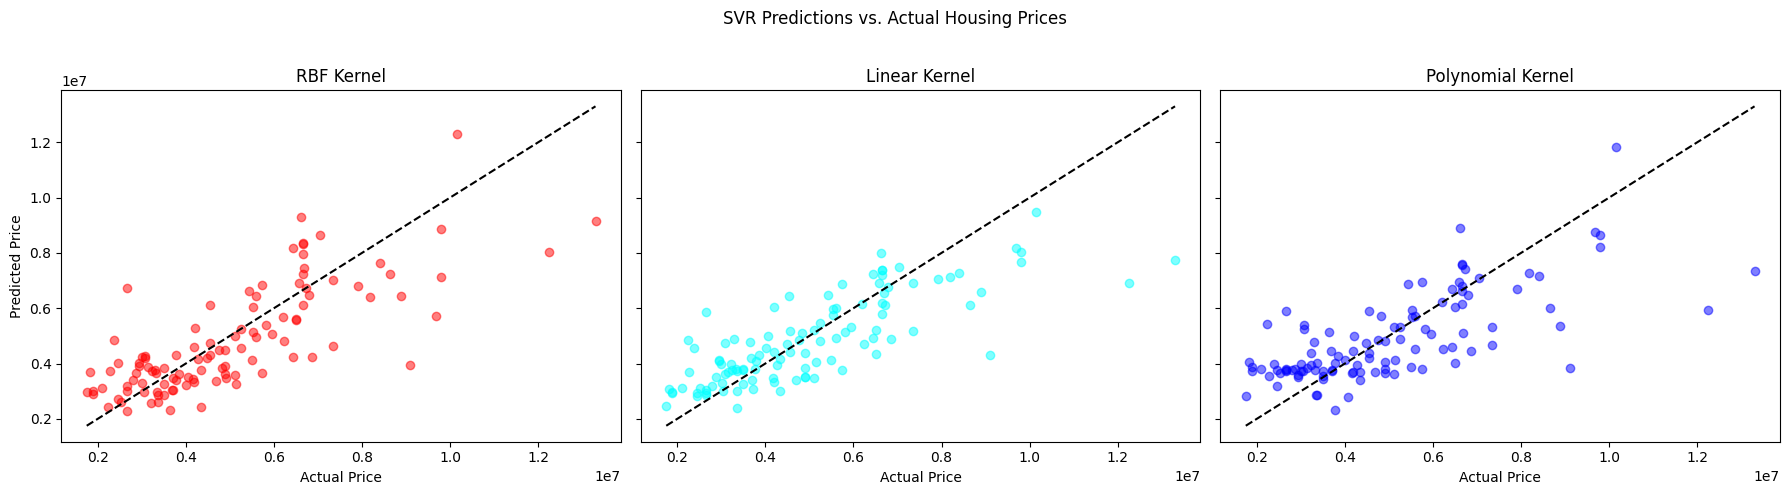

In [89]:
# Scatter plots to compare predictions vs actual
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

axes[0].scatter(y_test_original, y_pred_rbf_original, color='red', alpha=0.5)
axes[0].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--')
axes[0].set_title('RBF Kernel')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')

axes[1].scatter(y_test_original, y_pred_lin_original, color='cyan', alpha=0.5)
axes[1].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--')
axes[1].set_title('Linear Kernel')
axes[1].set_xlabel('Actual Price')

axes[2].scatter(y_test_original, y_pred_poly_original, color='blue', alpha=0.5)
axes[2].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--')
axes[2].set_title('Polynomial Kernel')
axes[2].set_xlabel('Actual Price')

plt.suptitle('SVR Predictions vs. Actual Housing Prices')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()